## plan:
- learn the basics of gold, silver and CAD prices
- try a simple linear regression just to say that we tried it
- experiment with LSTMs
- account for inflation and other economic factors that may be relevant
- scrape news headlines and use them for sentiment analysis

In [ ]:
!pip install yfinance

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
gold = yf.download("GC=F", start="2025-01-01", end="2025-11-13")
silver = yf.download("SI=F", start="2025-01-01", end="2025-11-13")
cad = yf.download("CAD=X", start="2025-01-01", end="2025-11-13")

/tmp/ipykernel_8874/827727296.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gold = yf.download("GC=F", start="2025-01-01", end="2025-11-13")
[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_8874/827727296.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  silver = yf.download("SI=F", start="2025-01-01", end="2025-11-13")
[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_8874/827727296.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  cad = yf.download("CAD=X", start="2025-01-01", end="2025-11-13")
[*********************100%***********************]  1 of 1 completed


In [3]:
gold.head()

Price,Close,High,Low,Open,Volume
Ticker,GC=F,GC=F,GC=F,GC=F,GC=F
Date,,,,,
2025-01-02,2658.899902,2663.100098,2633.000000,2633.000000,1728
2025-01-03,2645.000000,2658.699951,2641.800049,2658.699951,591
2025-01-06,2638.399902,2647.000000,2617.300049,2645.500000,960
2025-01-07,2656.699951,2657.500000,2653.000000,2653.399902,643
2025-01-08,2664.500000,2676.899902,2653.500000,2655.500000,999


In [4]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 219 entries, 2025-01-02 to 2025-11-12
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, GC=F)   219 non-null    float64
 1   (High, GC=F)    219 non-null    float64
 2   (Low, GC=F)     219 non-null    float64
 3   (Open, GC=F)    219 non-null    float64
 4   (Volume, GC=F)  219 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 10.3 KB


In [5]:
gold.describe()

Price,Close,High,Low,Open,Volume
Ticker,GC=F,GC=F,GC=F,GC=F,GC=F
count,219.000000,219.000000,219.000000,219.000000,219.000000
mean,3327.209583,3347.771686,3302.216437,3323.114153,4117.452055
std,393.883730,399.953664,387.668937,394.063429,16781.635658
min,2638.399902,2647.000000,2617.300049,2633.000000,0.000000
25%,3015.650024,3035.349976,3002.649902,3020.349976,295.500000
50%,3327.100098,3343.500000,3304.899902,3327.300049,909.000000
75%,3435.450073,3459.800049,3401.250000,3431.400024,2068.500000
max,4336.399902,4358.000000,4214.600098,4354.700195,127758.000000


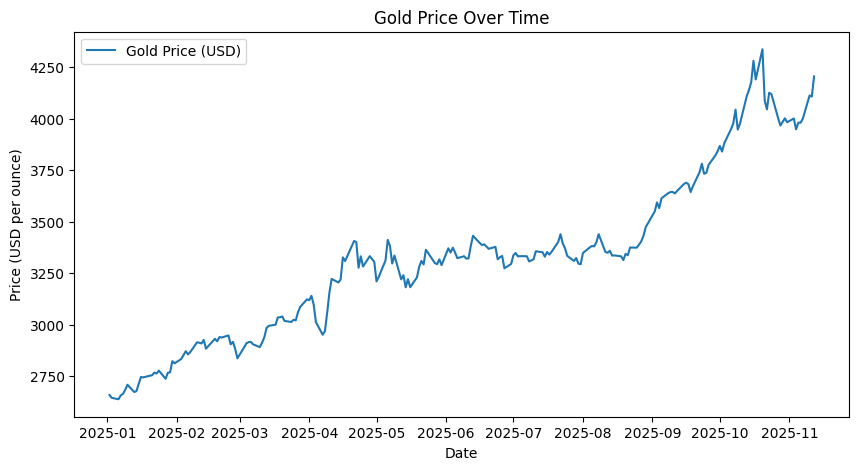

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(gold['Close'], label='Gold Price (USD)')
plt.title("Gold Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD per ounce)")
plt.legend()
plt.show()

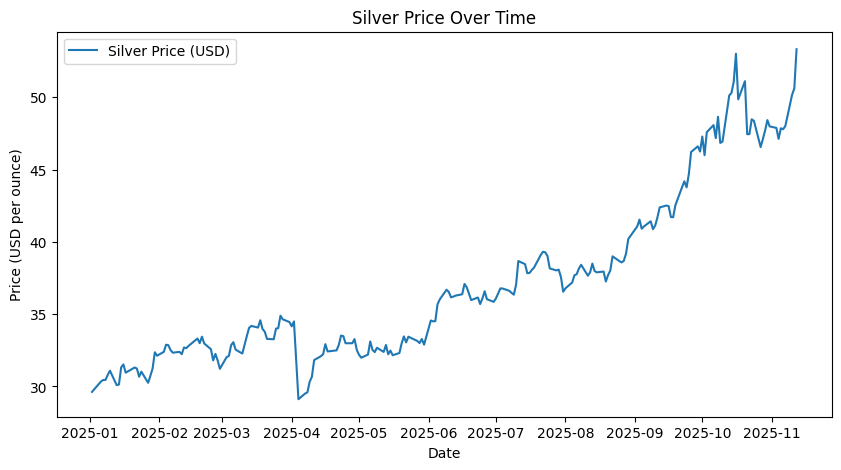

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(silver['Close'], label='Silver Price (USD)')
plt.title("Silver Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD per ounce)")
plt.legend()
plt.show()

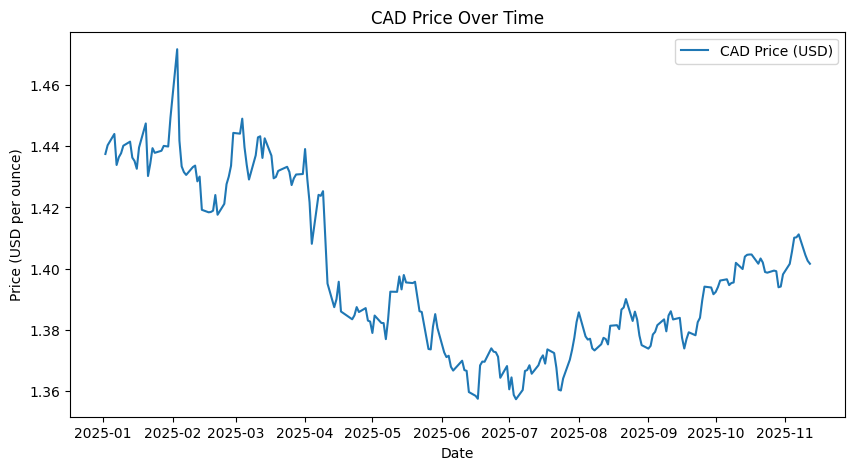

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(cad['Close'], label='CAD Price (USD)')
plt.title("CAD Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD per ounce)")
plt.legend()
plt.show()